In [8]:
import os
_FINAL_DFS_DIR = os.path.join('..', '..', 'final_dfs')

import sys
sys.path.append('..')
import plotconfig

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from scipy import stats
import pandas as pd
import numpy as np

In [10]:
dbf = os.path.join(_FINAL_DFS_DIR, 'results.parquet')
df = pd.read_parquet(dbf, engine='pyarrow')

mask = ((df['method_name'] != "BestSVR") &
        (df['method_name'] != "BestMLP") &
        (df['eeg_name'] == "EEG_Raw") & 
        (df['test_name'] == "random"))

df = df[mask]
df['method_name'].unique()

array(['LinearRegression', 'Shuffle_LinearRegression',
       'DummyScoring_Mean', 'SVR', 'MLP'], dtype=object)

In [11]:
df = pd.concat([df1[mask1], df2[mask2]], axis=0)
# df = df1[mask1]
df

NameError: name 'df1' is not defined

['LinearRegression', 'Shuffle_LinearRegression', 'DummyScoring_Mean', 'SVR', 'MLP', 'Theoretical Random']
['Linear Regression', 'Shuffle Linear Regression', 'Mean Dummy Regressor', 'SVR', 'MLP', 'Random Retrieval']
[ 0.          6.63529412 10.         15.         20.         25.
 30.         35.         40.        ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


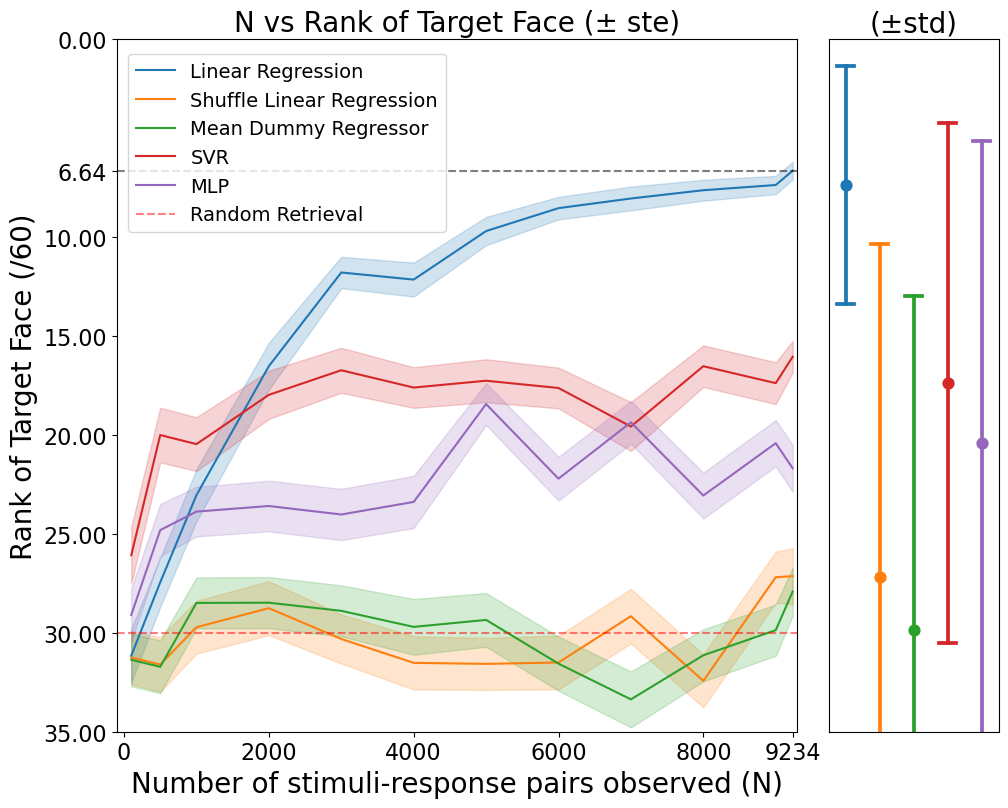

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 8), 
                               gridspec_kw={'width_ratios': [4, 1]})

sns.lineplot(data=df, 
             x='training_size', 
             y='target_rank', 
             hue='method_name', 
             errorbar=('se', 1),
             ax=ax1)

ax1.axhline(y=plotconfig.IR_RANDOM_TARGET_RANK, color='r', linestyle='--', alpha=0.5, label='Theoretical Random')


# Clear the existing legend
ax1.get_legend().remove()
# Create a new legend with custom labels and position
handles, labels = ax1.get_legend_handles_labels()
print(labels)
# new_labels = ['Linear Regression', 'Shuffle Linear Regression', 'Dummy Regressor (Mean)', 'Theoretical Random Retrieval']  # Replace with your desired labels
new_labels = ['Linear Regression', 'Shuffle Linear Regression', 'Mean Dummy Regressor', 'SVR', 'MLP', 'Random Retrieval']  # Replace with your desired labels
print(new_labels)
ax1.legend(handles, new_labels, 
           bbox_to_anchor=(0.25, 0.85),  # x, y coordinates inside the plot
           loc='center',               # Center the legend box at the specified coordinates
           # title_fontsize=14,
           fontsize=plotconfig.LEGEND_FONTSIZE)

ax1.set_title("N vs Rank of Target Face (± ste)", fontsize=plotconfig.LABEL_FONTSIZE)
ax1.set_xlabel("Number of stimuli-response pairs observed (N)", fontsize=plotconfig.LABEL_FONTSIZE)
ax1.set_ylabel("Rank of Target Face (/60)", fontsize=plotconfig.LABEL_FONTSIZE)

current_xticks = ax1.get_xticks()
new_xticks = np.sort(np.append(current_xticks, np.max(df['training_size'])
))
ax1.set_xticks(new_xticks)

current_yticks = ax1.get_yticks()
min_value = df[df['method_name'] == 'LinearRegression'].groupby('training_size')['target_rank'].mean().min()
current_yticks = current_yticks[current_yticks != 5]
new_yticks = np.sort(np.append(current_yticks, min_value))
ax1.set_yticks(new_yticks)
print(new_yticks)
ax1.axhline(y=min_value, color='k', linestyle='--', alpha=0.5)

ax1.tick_params(axis='x', labelsize=plotconfig.TICK_SIZE)
ax1.tick_params(axis='y', labelsize=plotconfig.TICK_SIZE)

# ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
# plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_locator(plt.AutoLocator())
ylim = [0, 35]
ax1.set_xlim(-100, 9300)  # Set x-axis limits from 0 to 60
ax1.set_ylim(ylim)  # Set y-axis limits from 0 to 10
ax1.invert_yaxis()


df_last = df[df['training_size'] == 9000]

sns.pointplot(x='method_name', y='target_rank', hue='method_name', data=df_last, 
              capsize=0.5, linestyle='none', errorbar='sd')

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('(±std)', fontsize=plotconfig.LABEL_FONTSIZE)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Remove y-ticks and labels
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove y-ticks and labels

ax2.set_ylim(ylim)  # Set y-axis limits from 0 to 10
ax2.invert_yaxis()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


# Save as high-definition
fbasename = "target_rank"
plt.gcf().savefig(f'{fbasename}.png', format='png', dpi=300, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.svg', format='svg', dpi=1200, bbox_inches='tight')

In [13]:
mask = ((df['training_size'] == plotconfig.N_FOR_PERF_SCORE_COMPARISON))
df = df[mask]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'DummyScoring_Mean'),
  Text(1, 0, 'Shuffle_LinearRegression'),
  Text(2, 0, 'LinearRegression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'MLP')])

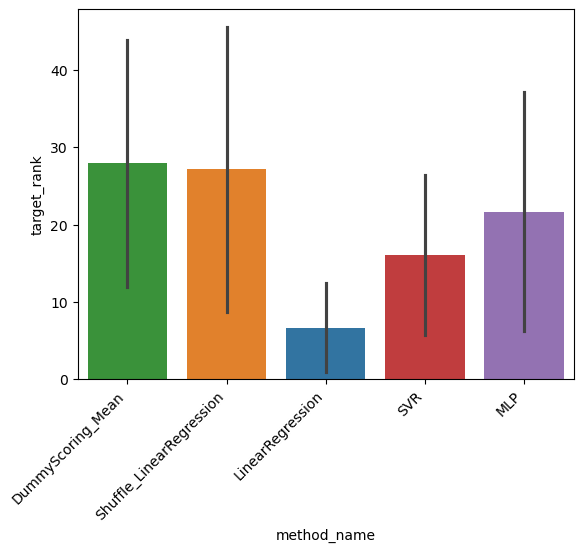

In [7]:
order = ['DummyScoring_Mean', 
         'Shuffle_LinearRegression', 
         'LinearRegression', 
         'SVR', 
         'MLP']

sns.barplot(data=df, 
            x='method_name', 
            y='target_rank', 
            hue='method_name', 
            order=order,
            errorbar='sd')

plt.xticks(rotation=45, ha='right')

# plt.gca().invert_yaxis()